# 习题 13.4 
### 从网上下载或自己编程实现TSVM算法，选择两个UCI数据集，将其30%的样例用作测试样本，10% 的样本用作有标记样
### 本，60%的样本用作无标记样本，分别训练出无标记样本的TSVM以及仅利用有标记样本的SVM，并比较其性能。

[UCI](http://archive.ics.uci.edu/ml/.)

## 1. TSVM 算法实现

在寻找满足条件,需要交换伪标记的样本 $x_i,x_j$ 时,<mark><font color=red size=4 face=雅黑>分别对伪正例样本和伪负例样本按 $\xi$ 值进行排序,取其最大者分别作为待交换样本 $x_i,x_j$ ,然后考察它们是否满足交换条件.只需要考虑这两个 $\xi$ 值最大的样本即可</font></mark>,因为如果它们都不满足条件,那么其余样本对也无法满足条件.

## 2. 运行结果

首先为了观察 TSVM 算法运行的效果,认为生成了简单的数据集进行测试,并且用动画形式展示算法运行过程:

![TSVM_ON_SAMPLE](./figure/demo1.gif)

上图中的生成数据集为明显可分线性划分的两簇数据，对于这样的数据集，即使用少量的有标记样本即可进行“正确”的划分，第一次指派伪标记结果即为“正确”结果，在整个TSVM算法运行过程中，伪标记不再发生变化，不会进行伪标记交换操作。

![TSVM_ON_COMPLEX](./figure/demo2.gif)

上图生成的数据集的两簇数据存在交叠，无法明显线性划分，对于这样的数据集，引入带伪标记的样本后得到的分类器与之前仅有标记样本训练的分类器会有较大差异，将会导致样本伪标记不断交换。

**两个 UCI 数据集**

In [1]:
import sklearn.datasets as dt  # 引入 sklearn 数据集库
import pandas as pd


# 解决 pandas 列名使用中文数据不能对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)  # default == false
pd.set_option('display.unicode.east_asian_width', True)  # defunct == false

**1. 莺尾花数据集**

**sklearn.datasets.load_iris()**

In [2]:
"""
莺尾花数据集介绍
"""
iris = dt.load_iris()  # 初始化莺尾花数据集
data_iris = iris.data  # 训练样本
# 莺尾花类别: (0: Setosa, 1: Versicolour, 2: Virginica)
target_name_iris = iris.target_names
target_iris = iris.target  # 每个样本所属的莺尾花类别
data_iris = pd.DataFrame(data_iris, columns=["花萼长度", "花萼宽度", "花瓣长度", "花瓣宽度"])
print("data_iris is :\n\n", data_iris, "\n\n\n")
print("target_name_iris is :\n", target_name_iris, "\n")
print("target_iris is :\n", target_iris)

data_iris is :

      花萼长度  花萼宽度  花瓣长度  花瓣宽度
0         5.1       3.5       1.4       0.2
1         4.9       3.0       1.4       0.2
2         4.7       3.2       1.3       0.2
3         4.6       3.1       1.5       0.2
4         5.0       3.6       1.4       0.2
..        ...       ...       ...       ...
145       6.7       3.0       5.2       2.3
146       6.3       2.5       5.0       1.9
147       6.5       3.0       5.2       2.0
148       6.2       3.4       5.4       2.3
149       5.9       3.0       5.1       1.8

[150 rows x 4 columns] 



target_name_iris is :
 ['setosa' 'versicolor' 'virginica'] 

target_iris is :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**2. 手写数字数据集**

**sklearn.datasets.load_digits()**


In [40]:
"""
手写数字数据集介绍
"""
digits = dt.load_digits()  # 初始化手写数字数据集
image_digits = digits.images  # 保存每个样本的 8*8 像素图像
data_digits = digits.data  # 一维数组,将每个数字的 8*8 像素展开成一行,为每个数字的特征向量
target_name_digits = digits.target_names  # 数字类别 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
target_digits = digits.target  # 每张数字图片的所属类别
print("size:\n", len(data_digits),  "\n")
print("image_digits is :\n", image_digits, "\n")
print("data_digits is :\n", data_digits, "\n")
print("target_name_digits is :\n", target_name_digits, "\n")
print("target_digits is :\n", target_digits, "\n")

size:
 1797 

image_digits is :
 [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2. 

In [15]:
# 红酒数据集
wine = dt.load_wine()
data_wine = wine.data
target_wine = wine.target
target_names_wine = wine.target_names
feature_names_wine = wine.feature_names
data_format_wine = pd.DataFrame(data_wine, columns=feature_names_wine)
print("data_wine is :\n", data_format_wine, "\n")
print("target_names_wine is :\n", target_names_wine, "\n")
print("target_wine is :\n", target_wine, "\n")
print("feature_names_wine is :\n", feature_names_wine, "\n")

data_wine is :
      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_pheno

In [16]:
# 威斯康辛州乳腺癌数据集
cancer = dt.load_breast_cancer()
data_cancer_format = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target_names_cancer = cancer.target_names
target_cancer = cancer.target
print("data_cancer is :\n", data_cancer_format, "\n")
print("target_names_cancer is :\n", target_names_cancer, "\n")
print("target_cancer is :\n", target_cancer, "\n")

data_cancer is :
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean c

# <mark>编程代码<mark>

In [41]:
from sklearn.svm import SVC  # SVM 功能实现包
from sklearn import datasets  # 深度学习数据集库
from sklearn.model_selection import train_test_split as split
"""
sklearn.model_selection.train_test_split 用来制作训练数据集和测试数据集,下面是常用因数介绍:
arrays: 分割对象同样长度的列表或者numpy arrays，矩阵
test_size: 两种指定方法.
1：指定小数。小数范围在0.0~0.1之间，它代表test集占据的比例.
2：指定整数。整数的大小必须在这个数据集个数范围内
默认值是0.25
train_size: 和test_size相似
random_state: 这是将分割的training和testing集合打乱的个数设定。如果不指定的话，也可以通过numpy.random来设定随机数
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation  # 绘制动画 b站 Up主 AniPython
from sklearn.metrics import f1_score
%matplotlib notebook

In [5]:
def TSVM(Dl, Du, Cl, Cu, gifname=None):
    """
该函数实现 TSVM 算法，其中支持向量机算法基于 sklearn 中的 SVC 类的线性支持向量机实现
    @param Dl: 有标记样本数据，格式为元组形式：(X1, y1)，其中 y1 取值为 {1, -1}
    @param Du: 未标记样本数据，仅 Xu
    @param Cl, Cu: 初始权重参数，Cu << Cl
    @param gifname: 如果要将 TSVM 算法过程保存为动画则传入文件名，默认不保存动画
    @return: clf，基于 sklearn 的支持向量机分类器
    """

    Xl, yl = Dl  # 取出标记样本的 data 和 target
    Xu = Du  # 取出无标记样本
    # 将 Xl 与 Xu 进行上下连接；np.c_[A, B] 为左右连接；等同于 np.append(A, B, axis=0 竖着 或 1 横着)
    X_mix = np.r_[Xl, Xu]

    # 用标记样本的 data 和 target 训练一个 SVM 分类器
    clf = SVC(C=Cl, kernel="linear").fit(Xl, yl)
    """
    parameter C: 惩罚系数，用来控制损失函数的惩罚系数，默认值为 1.0.
    C 越大，对错误分类的惩罚越大，导致训练测试数据时准确率高，容易导致过拟合，泛化能力若弱
    C 越小，对错误分类的惩罚越小，容错能力增强，泛化能力强，但是可能欠拟合
    parameter kernel：核函数类型，用来将非线性问题转化为线性问题的一种方法，默认为高斯核函数
    .fit(X) 用 X 去拟合分类器模型
    .predict(X) 用模型对 X 进行预测
    .fit_predict(X) 用 X 去拟合分类器模型并用拟合的分类器模型对 X 进行预测
    """
    yu = clf.predict(Xu)  # 对无标签样本进行分类预测，为它们指派伪标签

    # acts 用于存放后续绘制动画所用的参数，如：权重 w（模型中的 w1,...,wn）；偏移量（截距） b（模型中的 θ0）
    acts = [
        {
            # reshape(-1) 把列表变成一维矩阵，shape 为 (X, ), (X, ) 与 (X, 1) 不同，前者为 1 行 X 个元素的行向量，后者为 X 行 1 列的列向量
            # reshape(-1) 传入负数代表自动控制，如 reshape(-100, 2) 意思为变为两列，多少行由系统自己确定
            "w": clf.coef_.reshape(-1),
            "b": clf.intercept_,
            "text": "初始模型（仅有标记样本）"
        }
    ]
    acts.append({
        "assign": yu.copy(),
        "text": "分配伪标记"
    })
    while Cu < Cl:  # 伪标记样本权重小于标记样本时就迭代，直到 Cu == Cl
        sample_weight = [1.0] * len(yl) + [Cu / Cl] * len(yu)  # 为每个样本生成权重
        """
        初始设置真实标签样本的权重为 1.0，伪标签样本的权重伪 Cu / Cl，
        随着 Cu 逐渐增大直到于 Cl 相等，伪标签样本的重要性越来越大
        """
        clf.fit(X_mix, np.r_[
                yl, yu], sample_weight=sample_weight)  # 用真实标签样本、伪标签样本与样本权重重新训练 SVM
        acts.append({
            "w": clf.coef_.reshape(-1),
            "b": clf.intercept_,
            "text": "调整 Cu 为 %0.3E 后重新拟合" % Cu  # 保留三位小数的科学计数法
        })
        while True:
            f = clf.decision_function(Xu)  # 计算样本到划分超平面的函数距离 有正有负
            # 计算每个样本的 ξ，np.fmax(x1, x2) 数组元素逐元素返回最大值（这里为负数取零）
            xi = np.fmax(1 - f * yu, 0)
            """
            yu 中存放伪分类 {1, -1}，f * yu 为 计算样本到划分超平面的函数距离绝对值，1 - f * yu 即为 ξ
            np.fmax(1 - f * yu, 0) 为保存 1 - f * yu 的所有正值，详见附录图
            """
            y1_index = np.where(yu == 1)[0]  # 伪标签为 +1 的索引号
            y0_index = np.where(yu == -1)[0]  # 伪标签为 -1 的索引号
            max_1_xi = max(xi[yu == 1])  # 伪标签为 +1 的样本中最大的 ξ 值
            max_0_xi = max(xi[yu == -1])  # 伪标签为 1 的样本中最大的 ξ 值
            """
            只需分别考虑伪正负样本中最大ξ值的两个样本即可，
            因为若这两个最大ξ值的样本不满足条件(ξi>0,ξj>0,ξi+ξj>2)，
            那么其他样本对也必然无法满足了
            """
            if (max_1_xi > 0) and (max_0_xi > 0) and (max_1_xi + max_0_xi > 2):
                print("交换伪标记：ξ_+1=%0.3f，ξ_-1=%0.3f" % (max_1_xi, max_0_xi))
                i = y1_index[np.argmax(xi[yu == 1])]  # 伪标记为 +1 的样本中的最大ξ值对应的样本索引号
                j = y0_index[np.argmax(xi[yu == -1])] # 伪标记为 -1 的样本中的最大ξ值对应的样本索引号
                yu[i] *= -1
                yu[j] *= -1
                # 数组详细解释见附录
                acts.append({
                    "exchanging": [i, j],
                    "text": "交换伪标记中..."
                })
                acts.append({
                    "assign": yu.copy(),
                    "text": "交换完成"
                })
                clf.fit(X_mix, np.r_[yl, yu], sample_weight=sample_weight)
                acts.append({
                    "w": clf.coef_.reshape(-1),
                    "b": clf.intercept_,
                    "text": "交换标记后重新拟合"
                })
            else:
                break
        Cu = min(2 * Cu, Cl)
    acts.append({
        "text": "TSVM 算法执行完毕！"
    })

    # gifname 为传入的文件名
    if gifname != None:
        # 设置绘画中显示中文 rcParams 为参数字典，存储已经加载的配置项
        plt.rcParams["font.sans-serif"] = "SimHei"  # 使图形中的中文正常编码 SimHei 黑体
        plt.rcParams["axes.unicode_minus"] = False  # 使坐标轴刻度标签正常显示正负号

        fig = plt.figure()

        # 绘制有标记样本，用颜色区分正负样本
        plt.scatter(Xl[yl == 1, 0], Xl[yl == 1, 1], 40, "r", "+", "r")
        plt.scatter(Xl[yl == -1, 0], Xl[yl == -1, 1], 40, "g", "_", "g")
        # 绘制无标记样本，全部显示为黑色点
        plt.scatter(Xu[:, 0], Xu[:, 1], 10, "k")
        # 设置坐标轴上下限
        x1min, x1max = min(X_mix[:, 0]), max(X_mix[:, 0])
        x2min, x2max = min(X_mix[:, 1]), max(X_mix[:, 1])
        plt.xlim([x1min - (x1max - x1min) * 0.2,
                 x1max + (x1max - x1min) * 0.2])
        plt.ylim([x2min - (x2max - x2min) * 0.2,
                 x2max + (x2max - x2min) * 0.2])

        # 分类器决策线
        decision_line, = plt.plot([], [], "k")
        # 无标记样本之+1样本指派结果，颜色与有标记样本对应颜色相同
        unlabel_points1, = plt.plot([], [], marker='.', linestyle='', c='r')
        # 无标记样本之-1样本指派结果，颜色与有标记样本对应颜色相同
        unlabel_points0, = plt.plot([], [], marker='.', linestyle='', c='g')
        # 绘制交换标记操作的牵引线
        exchange, = plt.plot([0, 0], [0, 0], "m", linewidth=2)
        # 显示当前操作状态的文字说明 
        # plt.text(x, y, "说明文字", fontsize) x, y 表示说明文字第一个字所在的坐标
        state = plt.text((x1min + x1max) / 2, x2max + (x2max - x2min) * 0.1, "", fontsize=12)

        def update(num):
            # 更新动画帧的函数，num 为帧数
            act = acts[num]
            if "w" in act:
                decision_line.set_data(
                    [x1min, x1max],
                    [-(x1min * act["w"][0] + act["b"]) / act["w"][1], -
                     (x1max * act["w"][0] + act["b"]) / act["w"][1]]
                )
                exchange.set_linestyle("")
                state.set_text(act["text"])
            elif "exchanging" in act:
                i, j = act["exchanging"]
                exchange.set_linestyle("--")
#                 exchange.set_linewidth(2)
                exchange.set_data([Xu[i][0], Xu[j][0]], [Xu[i][1], Xu[j][1]])
                state.set_text(act["text"])
            elif "assign" in act:
                yu = act["assign"]
                unlabel_points1.set_data(Xu[yu == 1, 0], Xu[yu == 1, 1])
                unlabel_points0.set_data(Xu[yu == -1, 0], Xu[yu == -1, 1])
                state.set_text(act["text"])
            else:
                state.set_text(act["text"])

            return [decision_line, unlabel_points1, unlabel_points0, exchange, state]

        # 动画生成函数animation.FuncAnimation(),其中参数intervel为每帧的持续时间，单位为ms
        ani = animation.FuncAnimation(
            fig, update, frames=range(len(acts)), interval=1000)
        ani.save(str(gifname) + ".gif", writer="pillow")
        plt.show()
    return clf

<IPython.core.display.Javascript object>


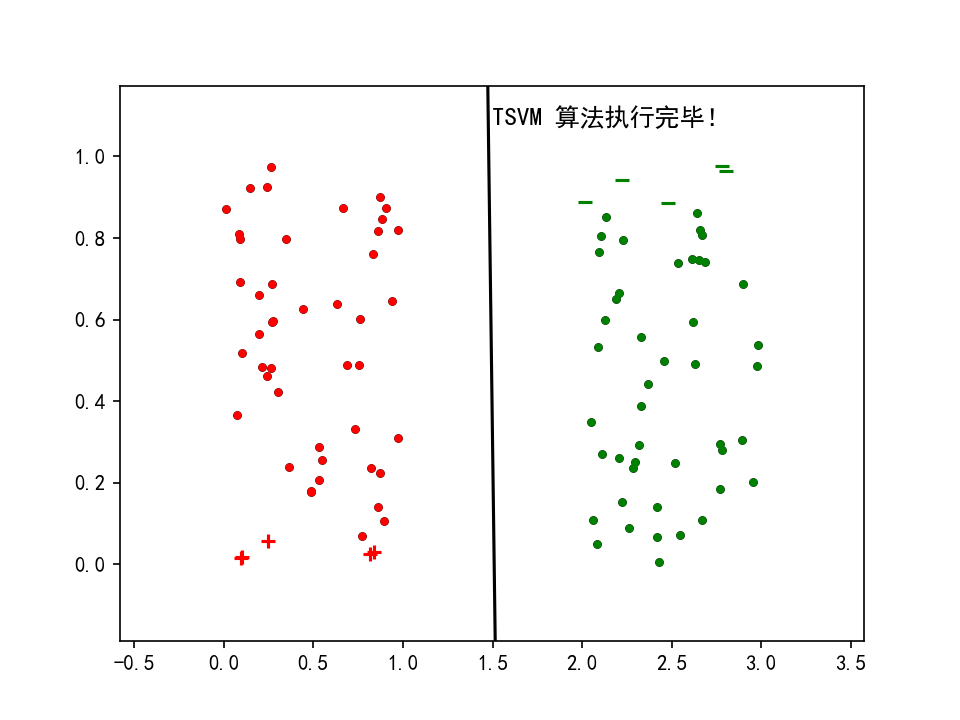

SVC(C=1, kernel='linear')

In [6]:
# ==========================================
#     生成简单二维数据集，
#     明显线性可分离的两类数据，
#     试验并观察TSVM算法过程
#     计算过程通过gif动画的形式进行演示
# ==========================================
# X1和X2为生成的两类数据
X1 = np.random.random([50, 2])
X2 = np.random.random([50, 2]) + [2, 0]
X1 = X1[np.argsort(X1[:, 1])] # np.argsort(a, axis) 将矩阵 a 按照 axis 排序，输出排序后各个元素的下标
X2 = X2[np.argsort(X2[:, 1])]
# 在X1和X2中各取五个样本组成有标记样本
Xl = np.r_[X1[:5], X2[-5:]]
yl = np.array([1] * 5 + [-1] * 5)
# 其余的样本作为无标记样本
Xu = np.r_[X1[5:], X2[:-5]]
TSVM((Xl, yl), Xu, 1, 0.0001, "demo1")

交换伪标记：ξ_+1=0.982，ξ_-1=1.041
交换伪标记：ξ_+1=0.966，ξ_-1=1.056
交换伪标记：ξ_+1=1.015，ξ_-1=1.089
交换伪标记：ξ_+1=0.945，ξ_-1=1.297
交换伪标记：ξ_+1=0.942，ξ_-1=1.210
交换伪标记：ξ_+1=0.960，ξ_-1=1.097
交换伪标记：ξ_+1=0.954，ξ_-1=1.093
交换伪标记：ξ_+1=0.963，ξ_-1=1.105
交换伪标记：ξ_+1=0.949，ξ_-1=1.068
交换伪标记：ξ_+1=1.098，ξ_-1=0.953
交换伪标记：ξ_+1=0.928，ξ_-1=1.122


<IPython.core.display.Javascript object>


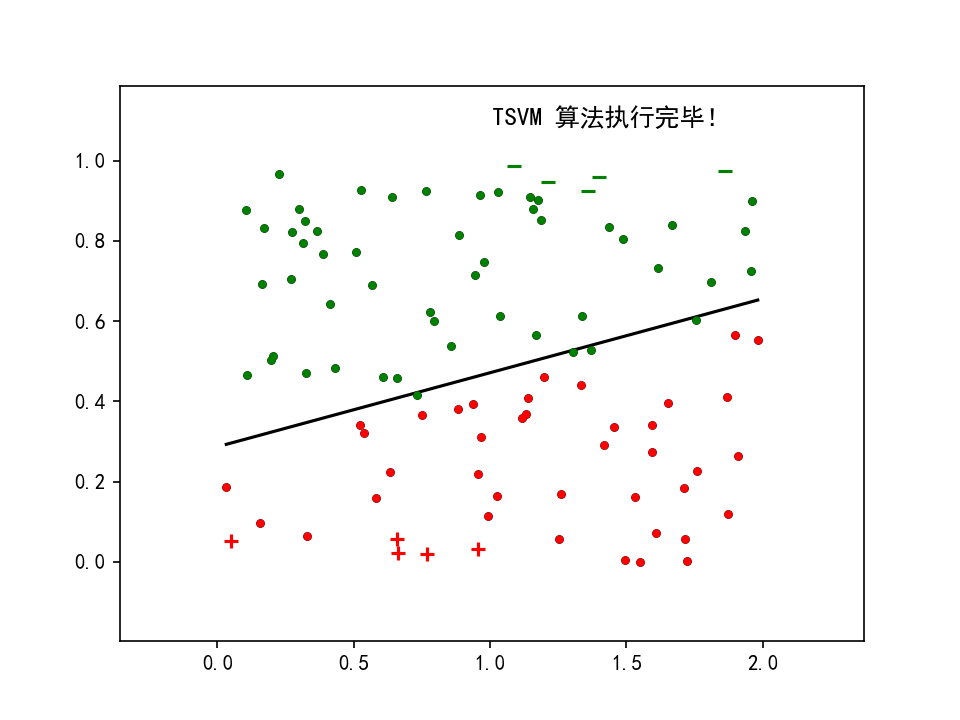

SVC(C=1, kernel='linear')

In [7]:
# ==========================================
#     同样生成简单二维数据集，
#     但是两类数据有重合，无法明显线性划分
# ==========================================
# X1和X2为生成的两类数据
X1 = np.random.random([50, 2])
X2 = np.random.random([50, 2]) + [1, 0]
X1 = X1[np.argsort(X1[:, 1])]
X2 = X2[np.argsort(X2[:, 1])]
# 在X1和X2中各取五个样本组成有标记样本
Xl = np.r_[X1[:5], X2[-5:]]
yl = np.array([1] * 5 + [-1] * 5)
# 其余的样本作为无标记样本
Xu = np.r_[X1[5:], X2[:-5]]
TSVM((Xl, yl), Xu, 1, 0.0001, "demo2")

In [45]:
#==========================================
#    在莺尾花数据集上进行试验
#==========================================
print("-------在莺尾花数据集上进行试验-------")
iris = datasets.load_iris()
X = iris["data"]
y = (iris["target"] == 1) * 2 - 1  #将第 2 类设为y=+1,第 1、3 类设为y=-1 详解见附录

#划分数据集:X_test:Xu:Xl样本比例为：3:6:1
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=12) # 样本特征集合，样本标签，样本占比，随机数种子（控制每次实验划分结果相同）
Xu, Xl, yu, yl = split(X_train, y_train, test_size=1/7, random_state=12)

#单独有标记样本进行训练和预测
Cl = 1
clf0 = SVC(C=Cl, kernel="linear").fit(Xl, yl)
y_pre0 = clf0.predict(X_test)
acc0 = (y_pre0 == y_test).mean()
print("仅用有标记样本进行训练的模型的预测精度为：", acc0)

micro_f1 = f1_score(y_test, y_pre0, average='micro')
macro_f1 = f1_score(y_test, y_pre0, average='macro')
# 额外补充acc计算，记住需要除以对应数据集大小
accuracy = (y_pre0 == y_test).sum() / len(y_pre0)
print("micore_f1 is:\n", micro_f1)
print("macro_f1 is:\n", macro_f1)
print("accuracy is:\n", accuracy, "\n")

#利用无标记样本的半监督模型
Cl, Cu = 1, 0.0001
clf1 = TSVM((Xl, yl), Xu, Cl, Cu)
y_pre1 = clf1.predict(X_test)
acc1 = (y_pre1 == y_test).mean()
print("利用无标记样本的半监督模型的预测精度为：", acc1)
print("预测精度提高了%.2f%%" % ((acc1 - acc0) * 100))

micro_f1 = f1_score(y_test, y_pre1, average='micro')
macro_f1 = f1_score(y_test, y_pre1, average='macro')
# 额外补充acc计算，记住需要除以对应数据集大小
accuracy = (y_pre1 == y_test).sum() / len(y_pre1)
print("micore_f1 is:\n", micro_f1)
print("macro_f1 is:\n", macro_f1)
print("accuracy is:\n", accuracy)

-------在莺尾花数据集上进行试验-------
仅用有标记样本进行训练的模型的预测精度为： 0.7111111111111111
micore_f1 is:
 0.7111111111111111
macro_f1 is:
 0.6801530891197376
accuracy is:
 0.7111111111111111 

交换伪标记：ξ_+1=0.971，ξ_-1=1.188
利用无标记样本的半监督模型的预测精度为： 0.7333333333333333
预测精度提高了2.22%
micore_f1 is:
 0.7333333333333333
macro_f1 is:
 0.709051724137931
accuracy is:
 0.7333333333333333


In [46]:
#==========================================
#    在手写数据集上进行试验
#==========================================
print("-------在手写数据集上进行试验-------")
digits = datasets.load_digits()
X = digits["data"]
y = (digits["target"] < 5) * 2 - 1  #将0~4设为y=+1,第5~9设为y=-1

#划分数据集:X_test:Xu:Xl样本比例为：3:6:1
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=12)
Xu, Xl, yu, yl = split(X_train, y_train, test_size=1/7, random_state=12)

#单独有标记样本进行训练和预测
Cl = 1
clf0 = SVC(C=Cl, kernel="linear").fit(Xl, yl)
y_pre0 = clf0.predict(X_test)
acc0 = (y_pre0 == y_test).mean()
print("仅用有标记样本进行训练的模型的预测精度为：", acc0)

micro_f1 = f1_score(y_test, y_pre0, average='micro')
macro_f1 = f1_score(y_test, y_pre0, average='macro')
# 额外补充acc计算，记住需要除以对应数据集大小
accuracy = (y_pre0 == y_test).sum() / len(y_pre0)
print("micore_f1 is:\n", micro_f1)
print("macro_f1 is:\n", macro_f1)
print("accuracy is:\n", accuracy, "\n")


#利用无标记样本的半监督模型
Cl, Cu = 1, 0.0001
clf1 = TSVM((Xl, yl), Xu, Cl, Cu)
y_pre1 = clf1.predict(X_test)
acc1 = (y_pre1 == y_test).mean()
print("利用无标记样本的半监督模型的预测精度为：", acc1)
print("预测精度提高了%.2f%%" % ((acc1 - acc0) * 100))

micro_f1 = f1_score(y_test, y_pre1, average='micro')
macro_f1 = f1_score(y_test, y_pre1, average='macro')
# 额外补充acc计算，记住需要除以对应数据集大小
accuracy = (y_pre1 == y_test).sum() / len(y_pre1)
print("micore_f1 is:\n", micro_f1)
print("macro_f1 is:\n", macro_f1)
print("accuracy is:\n", accuracy)

-------在手写数据集上进行试验-------
仅用有标记样本进行训练的模型的预测精度为： 0.7685185185185185
micore_f1 is:
 0.7685185185185186
macro_f1 is:
 0.7677531232904049
accuracy is:
 0.7685185185185185 

交换伪标记：ξ_+1=0.969，ξ_-1=1.062
交换伪标记：ξ_+1=0.949，ξ_-1=1.089
交换伪标记：ξ_+1=0.960，ξ_-1=1.133
交换伪标记：ξ_+1=1.008，ξ_-1=1.020
交换伪标记：ξ_+1=1.038，ξ_-1=1.146
交换伪标记：ξ_+1=1.351，ξ_-1=0.762
利用无标记样本的半监督模型的预测精度为： 0.7703703703703704
预测精度提高了0.19%
micore_f1 is:
 0.7703703703703704
macro_f1 is:
 0.7693452380952381
accuracy is:
 0.7703703703703704


In [51]:
#==========================================
#    在红酒数据集上进行试验
#==========================================
print("-------在红酒数据集上进行试验-------")
wine = datasets.load_wine()
X = wine["data"]
y = (wine["target"] == 1) * 2 - 1

#划分数据集:X_test:Xu:Xl样本比例为：3:6:1
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=12)
Xu, Xl, yu, yl = split(X_train, y_train, test_size=1/7, random_state=12)

#单独有标记样本进行训练和预测
Cl = 1
clf0 = SVC(C=Cl, kernel="linear").fit(Xl, yl)
y_pre0 = clf0.predict(X_test)
acc0 = (y_pre0 == y_test).mean()
print("仅用有标记样本进行训练的模型的预测精度为：", acc1)


micro_f1 = f1_score(y_test, y_pre1, average='micro')
macro_f1 = f1_score(y_test, y_pre1, average='macro')
# 额外补充acc计算，记住需要除以对应数据集大小
accuracy = (y_pre1 == y_test).sum() / len(y_pre1)
print("micore_f1 is:\n", micro_f1)
print("macro_f1 is:\n", macro_f1)
print("accuracy is:\n", accuracy)

print("利用无标记样本的半监督模型的预测精度为：", acc0)

#利用无标记样本的半监督模型
Cl, Cu = 1, 0.0001
clf1 = TSVM((Xl, yl), Xu, Cl, Cu)
y_pre1 = clf1.predict(X_test)
acc1 = (y_pre1 == y_test).mean()

print("预测精度提高了%.2f%%" % ((acc0 - acc1) * 100))

micro_f1 = f1_score(y_test, y_pre0, average='micro')
macro_f1 = f1_score(y_test, y_pre0, average='macro')
# 额外补充acc计算，记住需要除以对应数据集大小
accuracy = (y_pre0 == y_test).sum() / len(y_pre0)
print("micore_f1 is:\n", micro_f1)
print("macro_f1 is:\n", macro_f1)
print("accuracy is:\n", accuracy, "\n")

-------在红酒数据集上进行试验-------
仅用有标记样本进行训练的模型的预测精度为： 0.8148148148148148
micore_f1 is:
 0.8148148148148148
macro_f1 is:
 0.7916666666666667
accuracy is:
 0.8148148148148148
利用无标记样本的半监督模型的预测精度为： 0.8703703703703703
交换伪标记：ξ_+1=1.100，ξ_-1=1.284
交换伪标记：ξ_+1=1.052，ξ_-1=1.147
交换伪标记：ξ_+1=1.104，ξ_-1=1.178
交换伪标记：ξ_+1=1.250，ξ_-1=0.892
预测精度提高了5.56%
micore_f1 is:
 0.8703703703703703
macro_f1 is:
 0.8520547945205479
accuracy is:
 0.8703703703703703 



In [49]:
#==========================================
#    在威斯康辛州乳腺癌数据集上进行试验
#==========================================
print("-------在威斯康辛州乳腺癌数据集上进行试验-------")
cancer = datasets.load_breast_cancer()
X = cancer["data"]
y = cancer["target"] * 2 - 1

#划分数据集:X_test:Xu:Xl样本比例为：3:6:1
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=12)
Xu, Xl, yu, yl = split(X_train, y_train, test_size=1/7, random_state=12)

#单独有标记样本进行训练和预测
Cl = 1
clf0 = SVC(C=Cl, kernel="linear").fit(Xl, yl)
y_pre0 = clf0.predict(X_test)
acc0 = (y_pre0 == y_test).mean()
print("仅用有标记样本进行训练的模型的预测精度为：", acc0)

micro_f1 = f1_score(y_test, y_pre0, average='micro')
macro_f1 = f1_score(y_test, y_pre0, average='macro')
# 额外补充acc计算，记住需要除以对应数据集大小
accuracy = (y_pre0 == y_test).sum() / len(y_pre0)
print("micore_f1 is:\n", micro_f1)
print("macro_f1 is:\n", macro_f1)
print("accuracy is:\n", accuracy, "\n")

#利用无标记样本的半监督模型
Cl, Cu = 1, 0.0001
clf1 = TSVM((Xl, yl), Xu, Cl, Cu)
y_pre1 = clf1.predict(X_test)
acc1 = (y_pre1 == y_test).mean()
print("利用无标记样本的半监督模型的预测精度为：", acc1)
print("预测精度提高了%.2f%%" % ((acc1 - acc0) * 100))

micro_f1 = f1_score(y_test, y_pre1, average='micro')
macro_f1 = f1_score(y_test, y_pre1, average='macro')
# 额外补充acc计算，记住需要除以对应数据集大小
accuracy = (y_pre1 == y_test).sum() / len(y_pre1)
print("micore_f1 is:\n", micro_f1)
print("macro_f1 is:\n", macro_f1)
print("accuracy is:\n", accuracy)

-------在威斯康辛州乳腺癌数据集上进行试验-------
仅用有标记样本进行训练的模型的预测精度为： 0.9239766081871345
micore_f1 is:
 0.9239766081871345
macro_f1 is:
 0.9185863394982604
accuracy is:
 0.9239766081871345 

交换伪标记：ξ_+1=1.144，ξ_-1=1.015
交换伪标记：ξ_+1=1.003，ξ_-1=1.072
交换伪标记：ξ_+1=1.176，ξ_-1=0.911
交换伪标记：ξ_+1=1.320，ξ_-1=0.893
交换伪标记：ξ_+1=1.347，ξ_-1=0.827
交换伪标记：ξ_+1=1.338，ξ_-1=0.673
利用无标记样本的半监督模型的预测精度为： 0.9298245614035088
预测精度提高了0.58%
micore_f1 is:
 0.9298245614035088
macro_f1 is:
 0.9250876168224299
accuracy is:
 0.9298245614035088


**附录**

![划分超平面与松弛变量ξ](./figure/划分超平面与松弛变量ξ.png)

![数组操作解释](./figure/np_opr_test.png)

![](./figure/npwhere.png)

![](./figure/gifname.png)

![](./figure/莺尾花样本2正一负一.png)

![](./figure/样本划分.png)

![](./figure/样本划分2.png)